In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from more_itertools import pairwise
from datetime import datetime

In [119]:
file_path = '../data/CSSE-data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
country_lookup_table = '../data/CSSE-data/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv'

In [120]:
df_raw = pd.read_csv(file_path)

In [121]:
df = df_raw.groupby('Country/Region').sum().iloc[:,2:]
df.columns = df.columns.map(lambda x: datetime.strptime(x,'%m/%d/%y'))

In [122]:
df_diff = pd.DataFrame()
for p1, p2 in pairwise(df.columns):
    df_diff[p2] = df[p2] - df[p1]

In [123]:
df_diff.T.to_csv('new_diff_data.csv',index=True)
df_diff.T

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-06,62,141,140,42,168,0,20870,760,14,1935,...,2404,3105,133,0,1526,11,2539,94,62,32
2021-04-07,94,256,125,35,125,4,22039,1025,6,3101,...,2797,3924,192,0,1115,11,2672,72,315,18
2021-04-08,70,317,112,46,98,3,23683,1231,5,2906,...,3124,3670,195,0,1184,9,2884,86,206,68
2021-04-09,76,286,135,47,134,2,24130,1029,6,2702,...,-4787,7289,207,0,1088,15,2378,100,191,95


In [124]:
window = 7
df_rolling = pd.DataFrame()
for country, r in df_diff.iterrows():
    df_rolling[country] = r.rolling(window=window).mean()

In [125]:
df_rolling

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-06,56.428571,316.142857,116.857143,54.857143,100.428571,5.285714,13609.142857,911.714286,10.714286,2909.285714,...,3309.428571,2943.142857,179.000000,0.0,1417.857143,7.714286,2342.285714,104.000000,124.571429,18.142857
2021-04-07,59.857143,290.714286,116.000000,50.428571,99.857143,5.857143,14463.857143,894.142857,9.000000,2825.571429,...,3121.142857,3062.571429,179.714286,0.0,1384.571429,8.000000,2397.142857,98.571429,138.285714,14.571429
2021-04-08,60.857143,286.142857,116.000000,50.857143,101.285714,4.714286,15785.714286,913.285714,8.142857,2760.285714,...,2915.285714,3209.857143,181.714286,0.0,1374.571429,7.285714,2481.714286,86.000000,149.000000,22.285714
2021-04-09,63.857143,279.000000,117.428571,48.714286,110.714286,4.285714,17818.285714,900.857143,7.857143,2698.142857,...,1742.571429,3768.285714,184.285714,0.0,1390.142857,9.000000,2500.285714,87.571429,150.428571,34.857143


In [126]:
df_countries = pd.read_csv(country_lookup_table)
df_countries.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania,2877800.0
2,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0
3,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra,77265.0
4,24,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.20270,17.873900,Angola,32866268.0


In [127]:
dict_population = df_countries.groupby('Country_Region')['Population'].max().to_dict()

In [128]:
df_rolling_norm = pd.DataFrame([value/dict_population[key] * 1000000 for key, value in df_rolling.iteritems()]).T

In [129]:
df_rolling_norm

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-06,1.449550,109.855743,2.664866,709.986965,3.055673,53.975516,301.115364,307.675427,0.420833,323.024262,...,48.749792,847.257962,5.348201,0.0,49.861443,0.079252,459.144229,3.486894,6.776095,1.220679
2021-04-07,1.537624,101.019628,2.645319,652.670309,3.038287,59.810706,320.026739,301.745612,0.353500,313.729285,...,45.976235,881.638490,5.369542,0.0,48.690892,0.082187,469.897546,3.304886,7.522087,0.980388
2021-04-08,1.563312,99.431113,2.645319,658.217082,3.081753,48.140325,349.274099,308.205735,0.319833,306.480471,...,42.943840,924.038401,5.429299,0.0,48.339224,0.074849,486.475576,2.883393,8.104893,1.499416
2021-04-09,1.640377,96.949058,2.677897,630.483216,3.368630,43.763932,394.246695,304.011476,0.308611,299.580616,...,25.669082,1084.796161,5.506129,0.0,48.886821,0.092461,490.116022,2.936080,8.182601,2.345241


In [130]:
df_rolling_norm.to_csv('7days_rolling_data_normed.csv', index=True)

<AxesSubplot:>

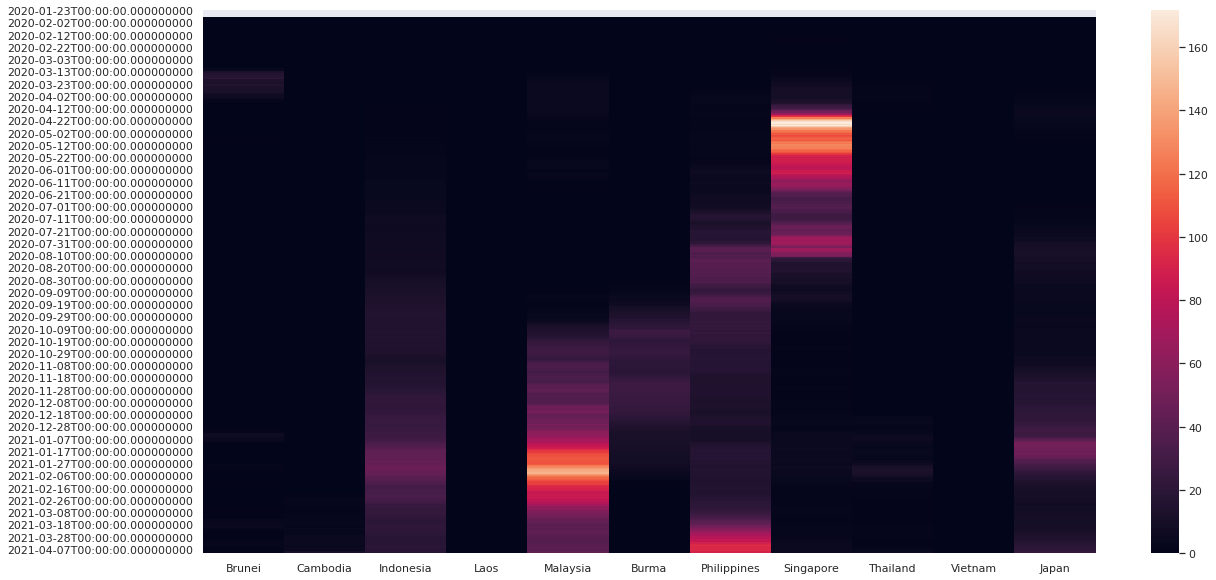

In [131]:
from matplotlib.colors import LogNorm
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df_rolling_norm[['Brunei','Cambodia','Indonesia','Laos','Malaysia','Burma','Philippines','Singapore','Thailand','Vietnam','Japan']])

<AxesSubplot:>

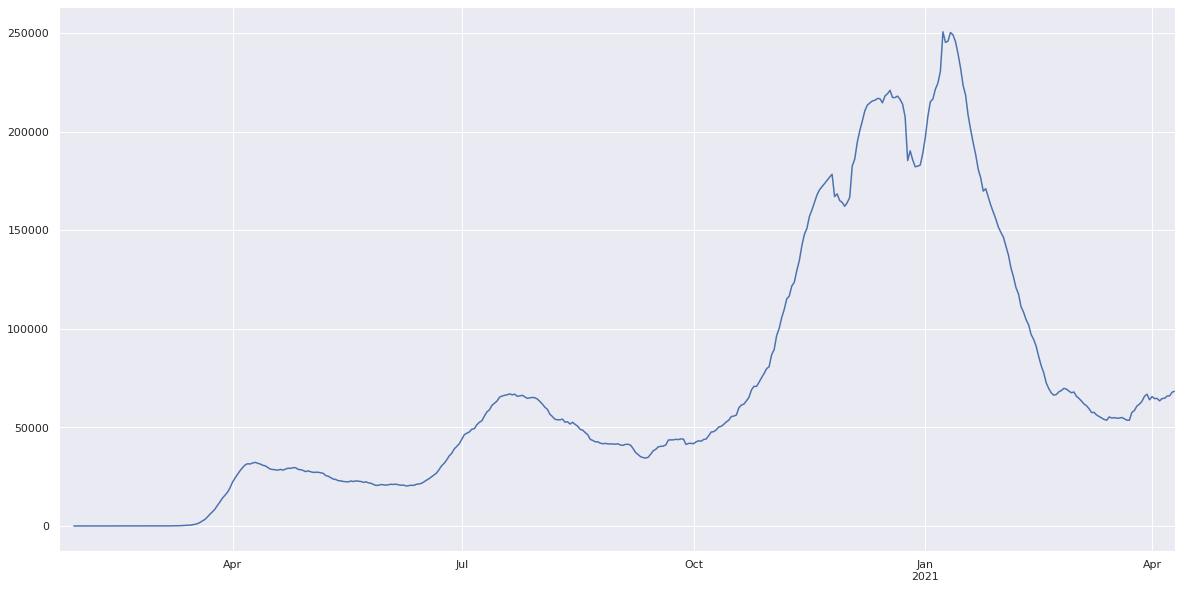

In [132]:
df_rolling['US'].plot.line()

In [133]:
for dt, c in df_rolling.iteritems():
    print(c.min())
    break

0.0


In [134]:
c[c>0]

2020-02-24     0.142857
2020-02-25     0.142857
2020-02-26     0.142857
2020-02-27     0.142857
2020-02-28     0.142857
                ...    
2021-04-06    56.428571
2021-04-07    59.857143
2021-04-08    60.857143
2021-04-09    63.857143
2021-04-10    78.428571
Name: Afghanistan, Length: 411, dtype: float64

<AxesSubplot:>

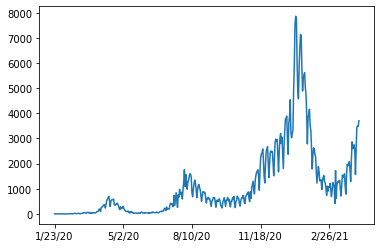

In [28]:
df_diff.T['Japan'].plot.line()

<AxesSubplot:>

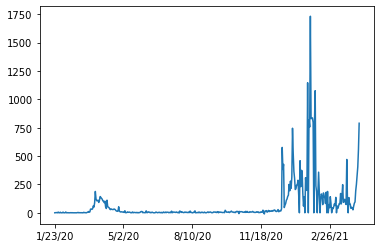

In [29]:
df_diff.T['Thailand'].plot.line()

In [15]:
df.columns.tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',